In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%env OPENAI_API_KEY=<Enter you key here>

from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.nlvr import create_prompt

In [4]:
interpreter = ProgramInterpreter(dataset='nlvr')
prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter, debug=True)


Registering VQA step
Registering EVAL step
Registering RESULT step


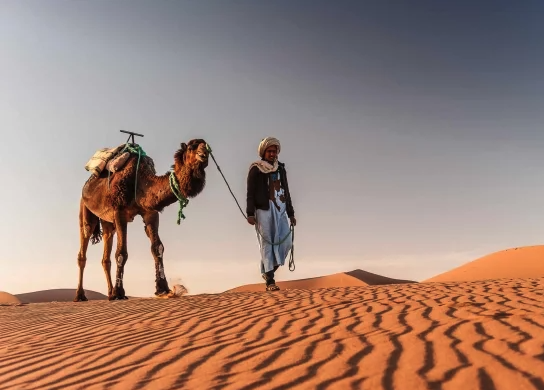

In [43]:
left_image = Image.open('../assets/camel1.png')
left_image.thumbnail((640,640),Image.Resampling.LANCZOS)
right_image = Image.open('../assets/camel2.png')
right_image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    LEFT=left_image.convert('RGB'),
    RIGHT=right_image.convert('RGB'),
)
right_image

In [38]:
answer="""ANSWER0 = VQA(image=LEFT, question='Is the camel sitting in the image?')
ANSWER1 = VQA(image=RIGHT, question='Is the camel sitting in the image?')
ANSWER2 = EVAL(expr='{ANSWER0} and {ANSWER1}')
FINAL_ANSWER = RESULT(var=ANSWER2)
"""

In [39]:
# statement = "There is a woman in black in exactly one of the images and two camels in total."
# statement = "There are more camels than people."
statement = "The camel is sitting in both images."
# statement = "There are no trees in the images."
prog,_ = generator.generate(dict(statement=statement), answer)
print(prog)

ANSWER0 = VQA(image=LEFT, question='Is the camel sitting in the image?')
ANSWER1 = VQA(image=RIGHT, question='Is the camel sitting in the image?')
ANSWER2 = EVAL(expr='{ANSWER0} and {ANSWER1}')
FINAL_ANSWER = RESULT(var=ANSWER2)


In [40]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
print('Answer:',result)

VQA


/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


VQA
EVAL
RESULT
Answer: False



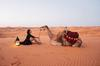
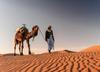

In [41]:
HTML(html_str)